In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
import json
import numpy as np
from report import read_dfs, index_dfs
from report import generate_bar_chart, generate_bar_chart_overlay
from report import report_gridsearch
from report import read_accs
from report import imagenet_files as files

np.set_printoptions(suppress=True, linewidth=np.inf)
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)


plt.rcParams.update({'font.size': 6})

attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']

logdir = 'results/imagenet'

## Low distortion

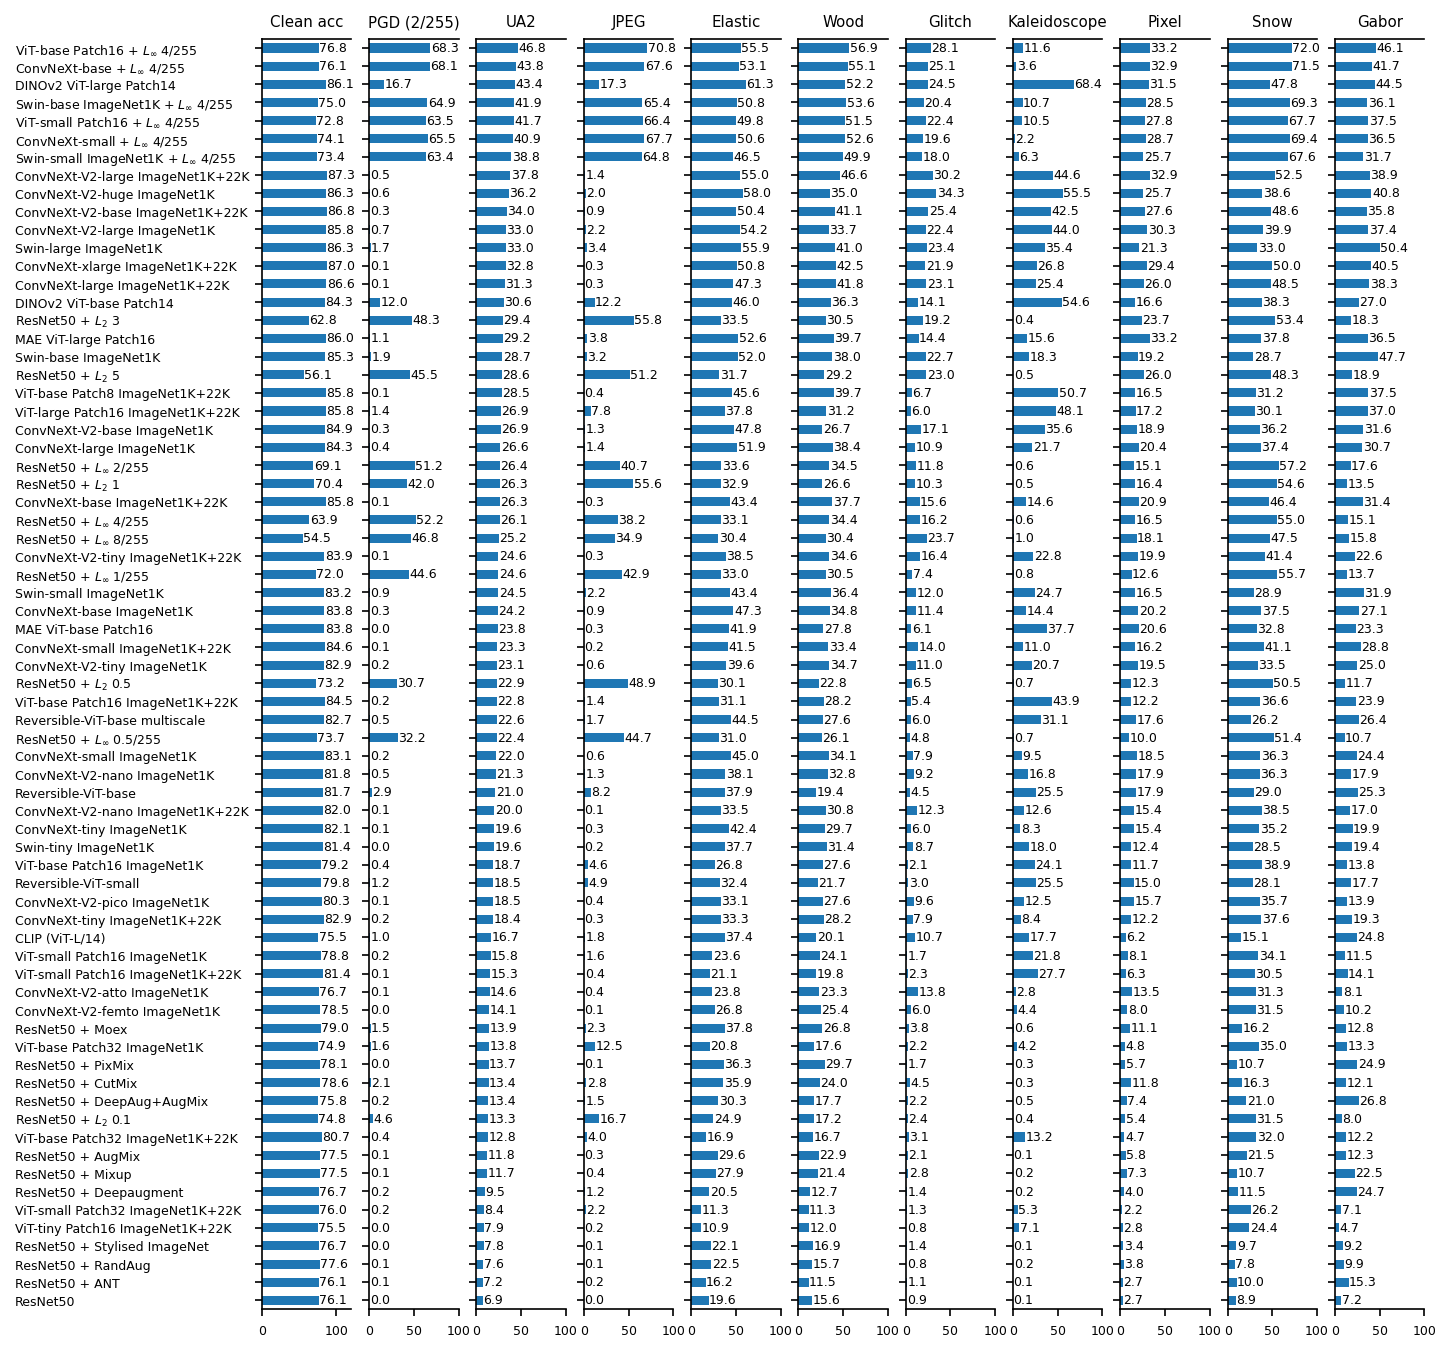

In [3]:

distortion = 'low'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (2/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

# df = df.dropna()
df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_imagenet_{distortion}.pdf', \
                           figsize=(10, 11), xlim=100, yticks_padding=115, xlim0=120)
df.to_csv(f'UA2_imagenet_{distortion}.csv', index=True)

## Medium distortion

In [4]:

distortion = 'medium'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (4/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))


# df = df.dropna()
df = df.sort_values('UA2', ascending=False)

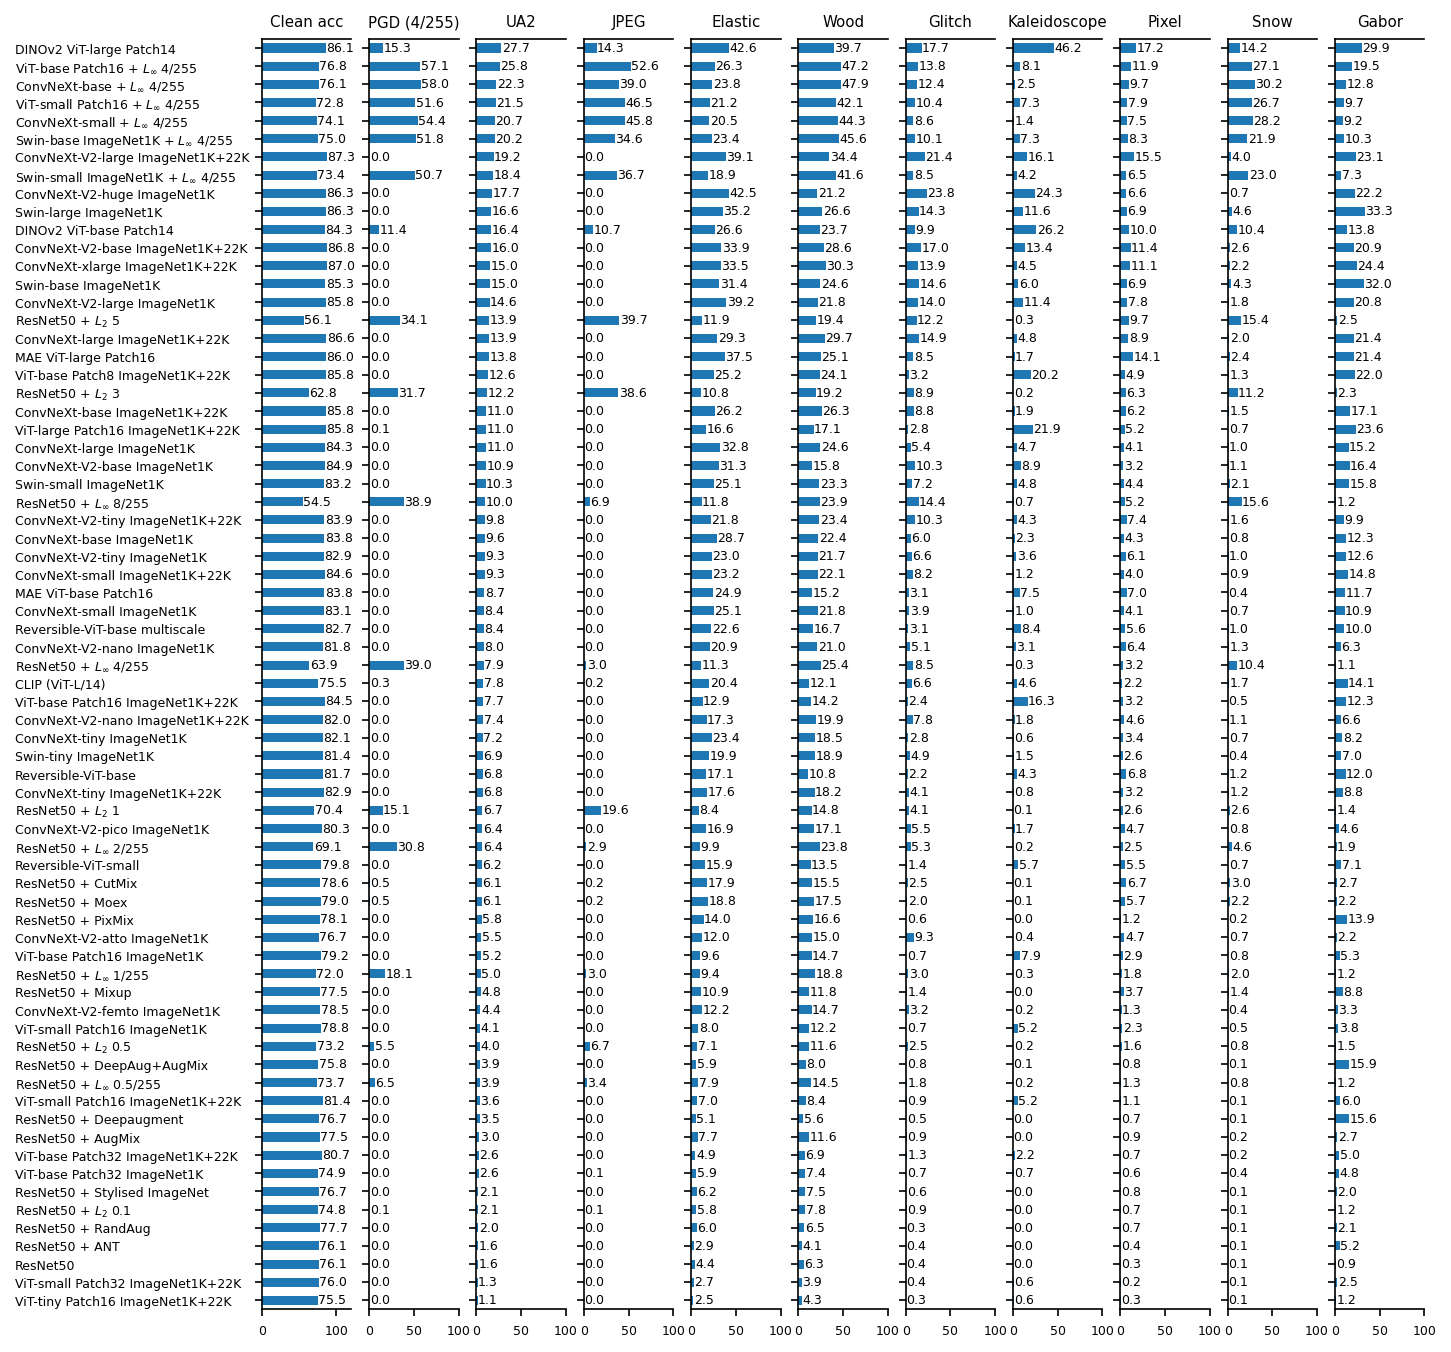

In [5]:
generate_bar_chart_overlay(df, file_name=f'UA2_imagenet_{distortion}.pdf', \
                           figsize=(10, 11), xlim=100, yticks_padding=115, xlim0=120)
df.to_csv(f'UA2_imagenet_{distortion}.csv', index=True)

### Correlations

In [13]:
cond = df.index.str.contains('L_inf') | df.index.str.contains('L_2')
robust_df = df[cond]
nonrobust_df = df[~cond]

In [14]:
robust_df[robust_df['UA2'] > 15]

,Clean acc,PGD (4/255),UA2,JPEG,Elastic,Wood,Glitch,Kaleidoscope,Pixel,Snow,Gabor


In [15]:
robust_df[robust_df['UA2'] < 15]

,Clean acc,PGD (4/255),UA2,JPEG,Elastic,Wood,Glitch,Kaleidoscope,Pixel,Snow,Gabor
ResNet50 + $L_2$ 5,56.13,34.10,13.90,39.71,11.92,19.41,12.25,0.30,9.67,15.42,2.51
ResNet50 + $L_2$ 3,62.83,31.72,12.17,38.57,10.78,19.16,8.86,0.20,6.35,11.19,2.26
ResNet50 + $L_2$ 1,70.43,15.10,6.72,19.57,8.44,14.76,4.14,0.13,2.63,2.65,1.43
ResNet50 + $L_2$ 0.5,73.17,5.53,4.00,6.73,7.10,11.60,2.48,0.19,1.61,0.78,1.52
ResNet50 + $L_2$ 0.1,74.78,0.11,2.07,0.09,5.77,7.77,0.89,0.04,0.68,0.11,1.25


In [16]:
robust_df

,Clean acc,PGD (4/255),UA2,JPEG,Elastic,Wood,Glitch,Kaleidoscope,Pixel,Snow,Gabor
ResNet50 + $L_2$ 5,56.13,34.10,13.90,39.71,11.92,19.41,12.25,0.30,9.67,15.42,2.51
ResNet50 + $L_2$ 3,62.83,31.72,12.17,38.57,10.78,19.16,8.86,0.20,6.35,11.19,2.26
ResNet50 + $L_2$ 1,70.43,15.10,6.72,19.57,8.44,14.76,4.14,0.13,2.63,2.65,1.43
ResNet50 + $L_2$ 0.5,73.17,5.53,4.00,6.73,7.10,11.60,2.48,0.19,1.61,0.78,1.52
ResNet50 + $L_2$ 0.1,74.78,0.11,2.07,0.09,5.77,7.77,0.89,0.04,0.68,0.11,1.25


In [17]:
nonrobust_df

,Clean acc,PGD (4/255),UA2,JPEG,Elastic,Wood,Glitch,Kaleidoscope,Pixel,Snow,Gabor
DINOv2 ViT-large Patch14,86.11,15.31,27.72,14.27,42.63,39.67,17.72,46.17,17.23,14.21,29.85
ViT-base Patch16 + $L_\infty$ 4/255,76.82,57.11,25.82,52.63,26.27,47.21,13.83,8.12,11.89,27.06,19.52
ConvNeXt-base + $L_\infty$ 4/255,76.07,57.98,22.26,38.98,23.75,47.85,12.38,2.46,9.66,30.22,12.77
ViT-small Patch16 + $L_\infty$ 4/255,72.80,51.58,21.47,46.46,21.19,42.09,10.40,7.32,7.88,26.74,9.67
ConvNeXt-small + $L_\infty$ 4/255,74.14,54.36,20.68,45.78,20.52,44.29,8.61,1.36,7.50,28.19,9.16
Swin-base ImageNet1K + $L_\infty$ 4/255,74.98,51.83,20.17,34.56,23.37,45.58,10.10,7.32,8.29,21.89,10.27
ConvNeXt-V2-large ImageNet1K+22K,87.27,0.00,19.21,0.00,39.12,34.40,21.43,16.07,15.54,3.95,23.14
Swin-small ImageNet1K + $L_\infty$ 4/255,73.44,50.74,18.35,36.74,18.88,41.64,8.50,4.16,6.54,23.01,7.30
ConvNeXt-V2-huge ImageNet1K,86.26,0.01,17.66,0.01,42.48,21.18,23.77,24.26,6.60,0.69,22.25
Swin-large ImageNet1K,86.32,0.02,16.58,0.00,35.17,26.65,14.34,11.56,6.93,4.64,33.31


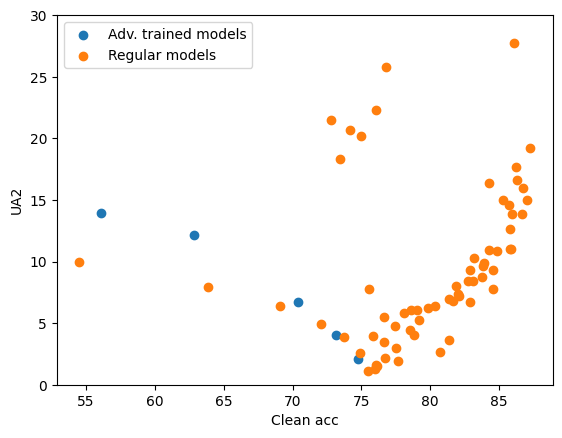

In [18]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

ax1.scatter(robust_df['Clean acc'], robust_df['UA2'], label='Adv. trained models')
ax1.scatter(nonrobust_df['Clean acc'], nonrobust_df['UA2'], label='Regular models')

# Uncomment to add model names
# for index, row in robust_df.iterrows():
#     ax1.text(row[0], row[2], str(index), fontsize=6, ha='center', va='center')

ax1.set_xlabel('Clean acc')
ax1.set_ylabel('UA2')
ax1.set_ylim([0, 30])
plt.legend(loc='upper left')

plt.legend()
plt.savefig(f'correlation.pdf', bbox_inches="tight", pad_inches = 0)

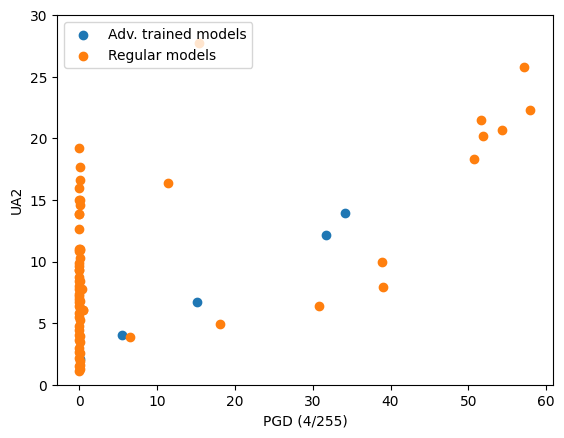

In [19]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

ax1.scatter(robust_df['PGD (4/255)'], robust_df['UA2'], label='Adv. trained models')
ax1.scatter(nonrobust_df['PGD (4/255)'], nonrobust_df['UA2'], label='Regular models')
ax1.set_xlabel('PGD (4/255)')
ax1.set_ylabel('UA2')
ax1.set_ylim([0, 30])

# Uncomment to add model names
# for index, row in robust_df.iterrows():
#     ax1.text(row[1], row[2], str(index), fontsize=6, ha='center', va='center')

plt.legend()
plt.legend(loc='upper left')
plt.savefig(f'correlation_pgd.pdf', bbox_inches="tight", pad_inches = 0)

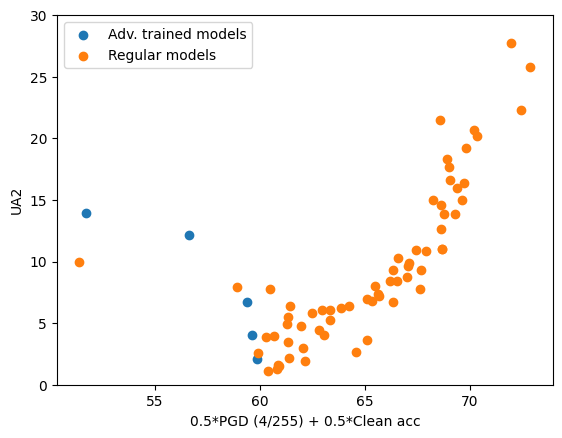

In [20]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

def combine(df1, df2, alpha=0.5):
    return alpha * df1 + (1 - alpha)*df2

ax1.scatter(combine(robust_df['PGD (4/255)'], robust_df['Clean acc'], alpha=0.2), \
            robust_df['UA2'], label='Adv. trained models')
ax1.scatter(combine(nonrobust_df['PGD (4/255)'], nonrobust_df['Clean acc'], alpha=0.2), \
            nonrobust_df['UA2'], label='Regular models')
ax1.set_xlabel('0.5*PGD (4/255) + 0.5*Clean acc')
ax1.set_ylabel('UA2')
ax1.set_ylim([0, 30])

# Uncomment to add model names
# for index, row in robust_df.iterrows():
#     ax1.text(row[1], row[2], str(index), fontsize=6, ha='center', va='center')

plt.legend()
plt.legend(loc='upper left')
plt.savefig(f'correlation_pgd_clean.pdf', bbox_inches="tight", pad_inches = 0)

## High distortion

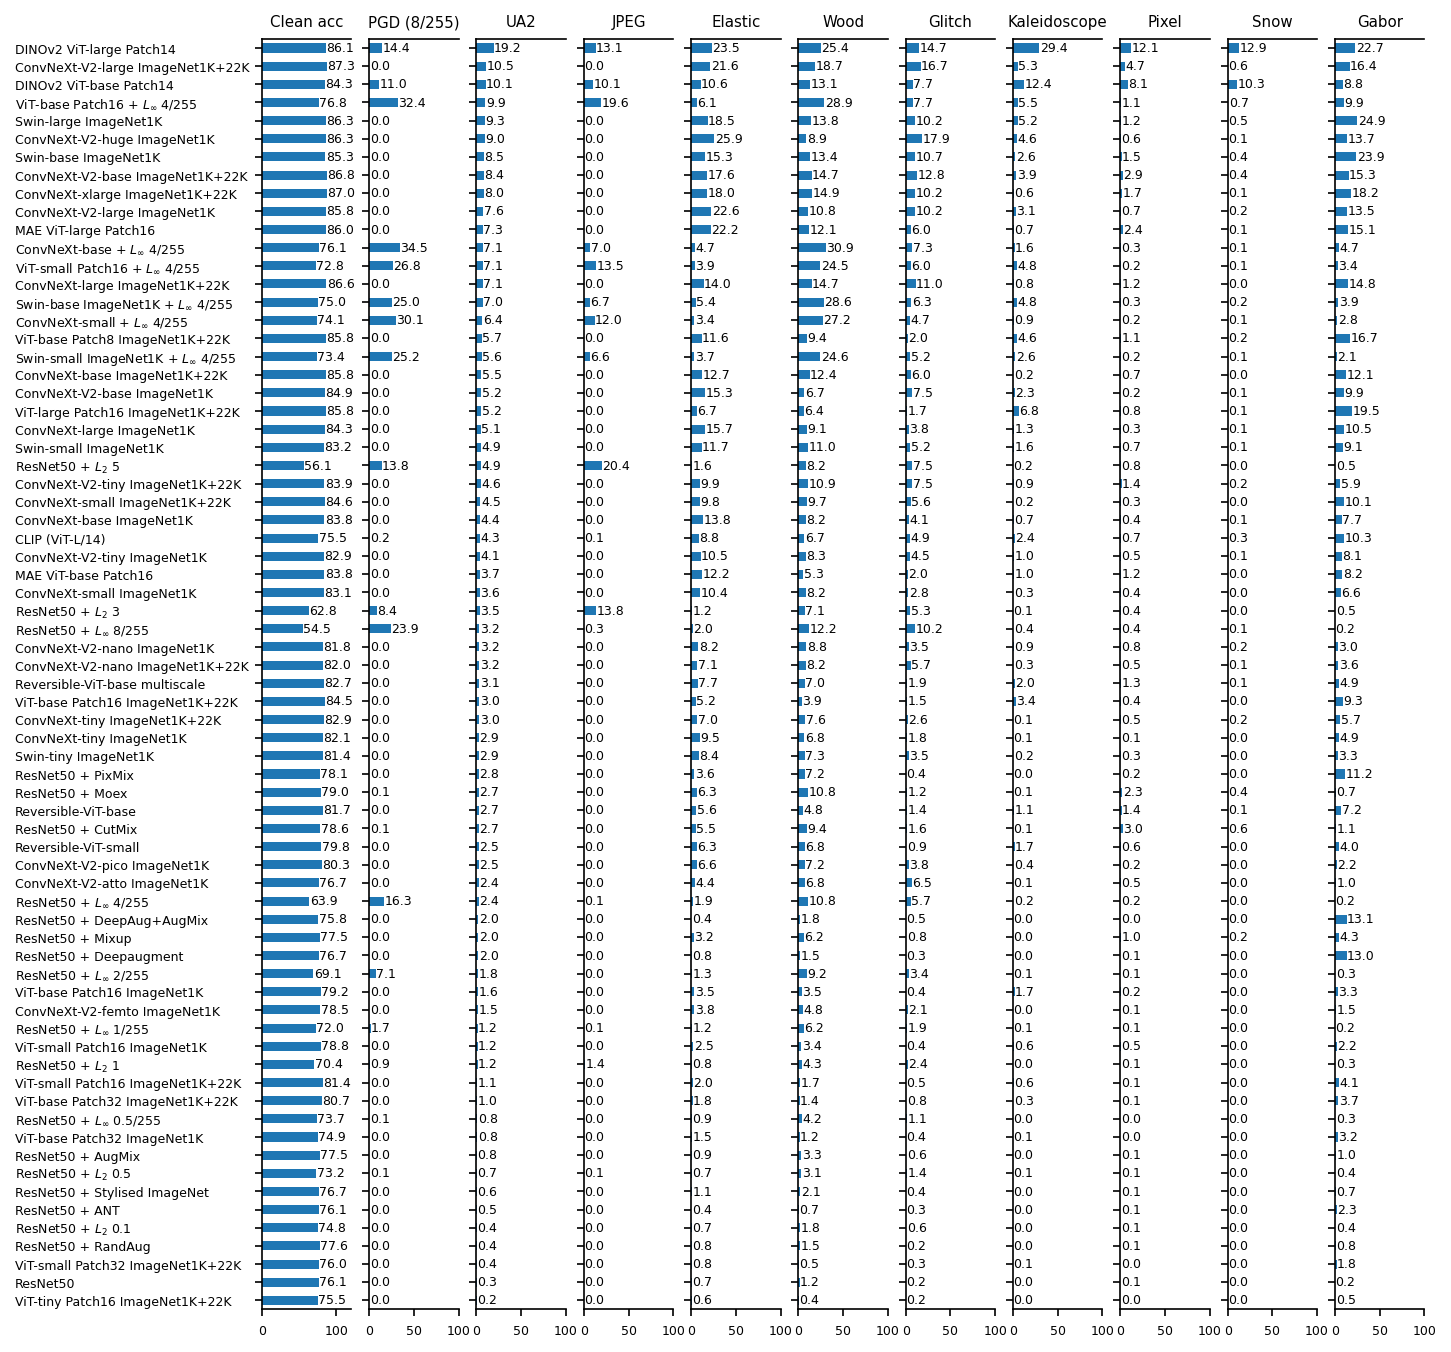

In [21]:
plt.rcParams.update({'font.size': 6})
distortion = 'high'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (8/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))
# df = df.dropna()
df = df.sort_values('UA2', ascending=False)
generate_bar_chart_overlay(df, file_name=f'UA2_imagenet_{distortion}.pdf', \
                           figsize=(10, 11), xlim=100, yticks_padding=115, xlim0=120)
df.to_csv(f'UA2_imagenet_{distortion}.csv', index=True)

## Random distortion vs optimized distortion

In [22]:
mean_df_random_distortion = {}
for distortion in ['low', 'medium', 'high']:
    series = []
    for attack in attacks:
        logfiles = [os.path.join('results/rand_corruption', f'{f}-{attack}-{distortion}.jsonl') for f in files]
        series.append(read_accs(*logfiles, name=attack))
    df = pd.concat(series, axis=1).reindex(series[0].index)
    df.insert(0, 'UA2', df.mean(axis=1).round(2))
#     df = df.dropna()
    mean_df_random_distortion[distortion] = df.mean(axis=0).round(2)
mean_df_random_distortion = pd.concat(mean_df_random_distortion, axis=1).T
print(mean_df_random_distortion.style.format('{:.1f}').to_latex())

\begin{tabular}{lrrrrrrrrr}
 & UA2 & jpeg & elastic & wood & glitch & kaleidoscope & pixel & snow & gabor \\
low & 70.1 & 78.9 & 76.2 & 68.0 & 72.3 & 37.7 & 78.6 & 78.5 & 70.7 \\
medium & 67.2 & 78.6 & 70.9 & 68.0 & 66.7 & 38.2 & 78.0 & 78.5 & 58.6 \\
high & 62.8 & 77.9 & 55.7 & 68.0 & 60.4 & 38.6 & 75.0 & 78.5 & 48.1 \\
\end{tabular}



In [23]:
mean_df = {}
for distortion in ['low', 'medium', 'high']:
    series = []
    for attack in attacks:
        logfiles = [os.path.join('results/imagenet', f'{f}-{attack}-{distortion}.jsonl') for f in files]
        series.append(read_accs(*logfiles, name=attack))
    df = pd.concat(series, axis=1).reindex(series[0].index)
    df.insert(0, 'UA2', df.mean(axis=1).round(2))
#     df = df.dropna()
    mean_df[distortion] = df.mean(axis=0).round(2)
mean_df = pd.concat(mean_df, axis=1).T
print(mean_df.style.format('{:.1f}').to_latex())

\begin{tabular}{lrrrrrrrrr}
 & UA2 & jpeg & elastic & wood & glitch & kaleidoscope & pixel & snow & gabor \\
low & 23.2 & 13.6 & 37.3 & 30.7 & 11.3 & 16.1 & 16.2 & 37.1 & 23.7 \\
medium & 9.4 & 5.8 & 18.5 & 19.9 & 6.4 & 5.1 & 5.0 & 4.3 & 10.5 \\
high & 4.1 & 1.8 & 7.3 & 9.2 & 4.4 & 1.8 & 0.9 & 0.4 & 6.7 \\
\end{tabular}



In [24]:
mean_df

,UA2,jpeg,elastic,wood,glitch,kaleidoscope,pixel,snow,gabor
low,23.25,13.59,37.29,30.71,11.28,16.11,16.25,37.06,23.71
medium,9.42,5.78,18.47,19.86,6.36,5.06,4.97,4.35,10.47
high,4.08,1.79,7.35,9.18,4.38,1.82,0.94,0.43,6.72


In [25]:
mean_df_random_distortion

,UA2,jpeg,elastic,wood,glitch,kaleidoscope,pixel,snow,gabor
low,70.11,78.88,76.20,68.05,72.27,37.69,78.58,78.51,70.70
medium,67.19,78.63,70.87,68.05,66.69,38.17,78.01,78.51,58.57
high,62.78,77.91,55.69,68.05,60.39,38.61,74.96,78.51,48.12


In [26]:
distortion = 'medium'
series = []
for attack in ['pgd'] + attacks:
    logfiles = [os.path.join('results/imagenet', f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df_medium = pd.concat(series, axis=1).reindex(series[0].index)
df_medium.insert(0, 'UA2', df_medium.mean(axis=1))

logfiles = [os.path.join('results/imagenet', f'{f}-none-{distortion}.jsonl') for f in files]
df_medium.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

In [27]:
distortion = 'medium'
series = []
for attack in ['pgd'] + attacks:
    logfiles = [os.path.join('results/rand_corruption', f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df_random = pd.concat(series, axis=1).reindex(series[0].index)
df_random.insert(0, 'UA2', df_random.mean(axis=1))

logfiles = [os.path.join('results/imagenet', f'{f}-none-{distortion}.jsonl') for f in files]
df_random.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

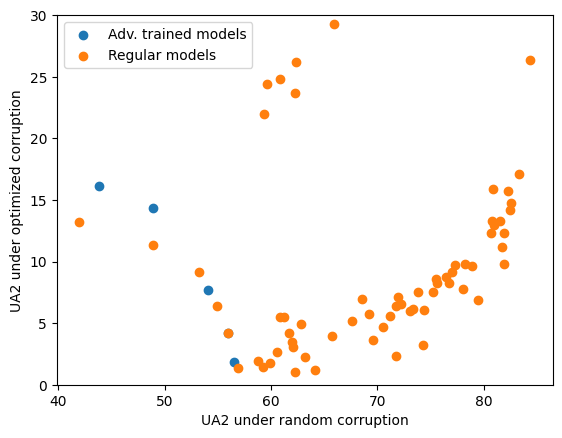

In [32]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

# assert (df_random.index == df_medium.index).all()
cond = df_random.index.str.contains('L_inf') | df_random.index.str.contains('L_2')

for i, c in enumerate([cond, ~cond]):
    if i == 0:
        ax1.scatter(df_random[c]['UA2'], df_medium[c]['UA2'], label='Adv. trained models')
    else:
        ax1.scatter(df_random[c]['UA2'], df_medium[c]['UA2'], label='Regular models')

ax1.set_ylabel('UA2 under optimized corruption')
ax1.set_xlabel('UA2 under random corruption')
ax1.set_ylim([0, 30])
# ax1.set_xlim([0, 100])

plt.legend()
# plt.savefig(f'correlation.pdf', bbox_inches="tight", pad_inches = 0)

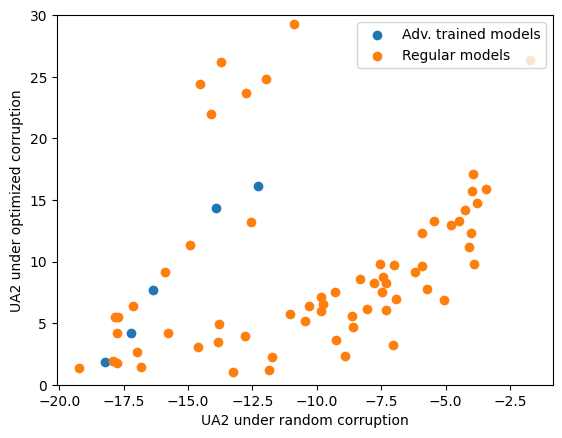

In [33]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

# assert (df_random.index == df_medium.index).all()
cond = df_random.index.str.contains('L_inf') | df_random.index.str.contains('L_2')

for i, c in enumerate([cond, ~cond]):
    if i == 0:
        ax1.scatter(df_random[c]['UA2']-df_random[c]['Clean acc'], df_medium[c]['UA2'], label='Adv. trained models')
    else:
        ax1.scatter(df_random[c]['UA2']-df_random[c]['Clean acc'], df_medium[c]['UA2'], label='Regular models')

ax1.set_ylabel('UA2 under optimized corruption')
ax1.set_xlabel('UA2 under random corruption')
ax1.set_ylim([0, 30])
# ax1.set_xlim([0, 100])

plt.legend()
# plt.savefig(f'correlation.pdf', bbox_inches="tight", pad_inches = 0)

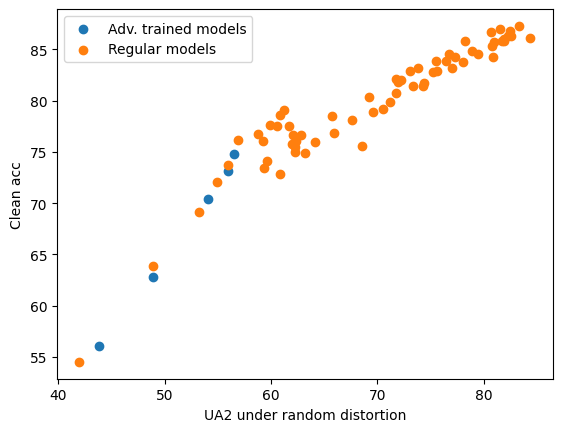

In [34]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

# assert (df_random.index == df_medium.index).all()
cond = df_random.index.str.contains('L_inf') | df_random.index.str.contains('L_2')

for i, c in enumerate([cond, ~cond]):
    if i == 0:
        ax1.scatter(df_random[c]['UA2'],df_random[c]['Clean acc'], label='Adv. trained models')
    else:
        ax1.scatter(df_random[c]['UA2'],df_random[c]['Clean acc'], label='Regular models')
     

ax1.set_ylabel('Clean acc')
ax1.set_xlabel('UA2 under random distortion')
# ax1.set_ylim([0, 30])
# ax1.set_xlim([0, 100])

plt.legend()
# plt.savefig(f'correlation.pdf', bbox_inches="tight", pad_inches = 0)

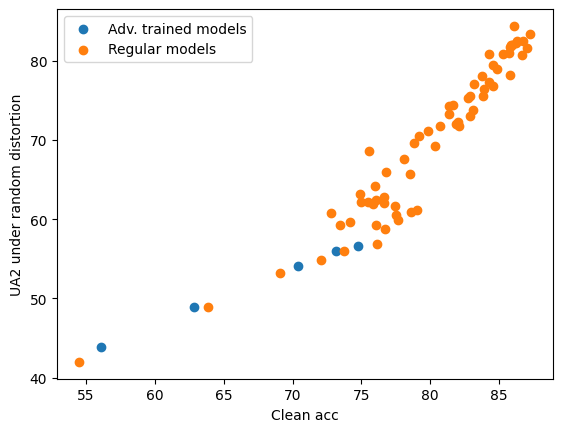

In [35]:
plt.rcParams.update({'font.size': 10})

fig, ax1 = plt.subplots(ncols=1)

# assert (df_random.index == df_medium.index).all()
cond = df_random.index.str.contains('L_inf') | df_random.index.str.contains('L_2')

for i, c in enumerate([cond, ~cond]):
    if i == 0:
        ax1.scatter(df_random[c]['Clean acc'], df_random[c]['UA2'], label='Adv. trained models')
    else:
        ax1.scatter(df_random[c]['Clean acc'], df_random[c]['UA2'], label='Regular models')        

ax1.set_xlabel('Clean acc')
ax1.set_ylabel('UA2 under random distortion')
# ax1.set_ylim([0, 30])
# ax1.set_xlim([0, 100])

plt.legend()
# plt.savefig(f'correlation.pdf', bbox_inches="tight", pad_inches = 0)